<a href="https://colab.research.google.com/github/kopmean/Teach-Basic-Ai/blob/main/02.Image_classification_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ref:https://adamharley.com/nn_vis/cnn/2d.html

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

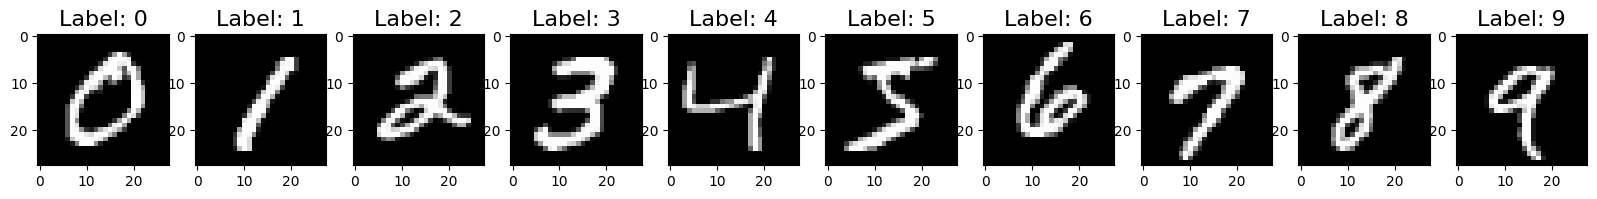

In [4]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Label: {i}", fontsize=16)

In [5]:
# one_hot_encoding
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Prepare Data

In [7]:
# Normalize Data 0-1
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
# Reshape Data matrix to vector
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [10]:
model = Sequential()
model.add(Dense(units=300, input_shape=(784,), activation='linear'))
model.add(Dense(units=100, activation='linear'))
# model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


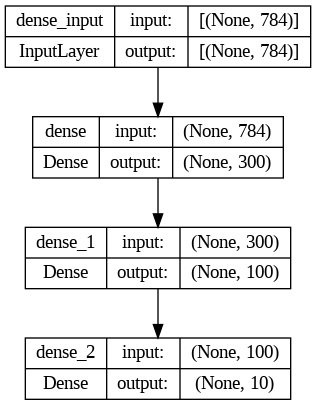

In [12]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

# Train

In [13]:
batch_size = 512
epochs = 50
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 9s 11ms/step - loss: 0.4726 - accuracy: 0.8585 - val_loss: 0.2996 - val_accuracy: 0.9137
Epoch 2/50
94/94 [==============================] - 1s 8ms/step - loss: 0.3007 - accuracy: 0.9167 - val_loss: 0.2848 - val_accuracy: 0.9211
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.2884 - accuracy: 0.9200 - val_loss: 0.2851 - val_accuracy: 0.9214
Epoch 4/50
94/94 [==============================] - 1s 9ms/step - loss: 0.2760 - accuracy: 0.9231 - val_loss: 0.2746 - val_accuracy: 0.9255
Epoch 5/50
94/94 [==============================] - 1s 8ms/step - loss: 0.2745 - accuracy: 0.9233 - val_loss: 0.2816 - val_accuracy: 0.9240
Epoch 6/50
94/94 [==============================] - 1s 8ms/step - loss: 0.2734 - accuracy: 0.9228 - val_loss: 0.2827 - val_accuracy: 0.9249
Epoch 7/50
94/94 [==============================] - 1s 8ms/step - loss: 0.2677 - accuracy: 0.9249 - val_loss: 0.2748 - val_accuracy: 0.9238
Epoch 8/50
94/94 [=

<Axes: >

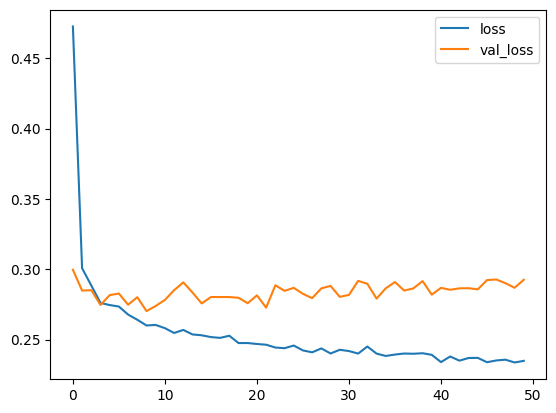

In [14]:
selected_data = {key: value for key, value in model.history.history.items() if key in ['loss', 'val_loss']}
pd.DataFrame(selected_data).plot()

<Axes: >

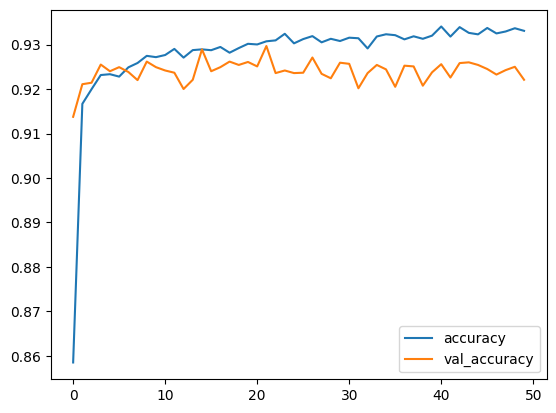

In [15]:
selected_data = {key: value for key, value in model.history.history.items() if key in ['accuracy', 'val_accuracy']}
pd.DataFrame(selected_data).plot()

# Evaluate

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.9196
Test Loss: 0.29776209592819214, Test Accuracy: 0.9196000099182129


In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred, y_pred.shape)
print(y_pred_classes, y_pred_classes.shape)

313/313 [==============================] - 1s 2ms/step
[[1.3353396e-07 1.8403989e-15 3.9795600e-07 ... 9.9682438e-01
  5.3524827e-06 2.4956674e-04]
 [2.4990699e-05 1.9857566e-07 9.9678457e-01 ... 3.0080209e-24
  1.7006547e-06 7.1077267e-19]
 [7.3478802e-08 9.9809903e-01 1.0234056e-03 ... 2.3314236e-04
  3.1781441e-04 1.8279939e-05]
 ...
 [1.3977952e-10 3.6988348e-10 2.5315381e-07 ... 4.7914212e-04
  3.9029487e-03 2.7566457e-02]
 [4.4510035e-11 6.6513872e-10 1.2343137e-09 ... 2.7283613e-09
  1.3999879e-02 4.8066809e-08]
 [2.1282796e-08 1.5202220e-14 1.1646713e-05 ... 1.1860936e-13
  8.2637062e-09 9.2229505e-12]] (10000, 10)
[7 2 1 ... 4 5 6] (10000,)


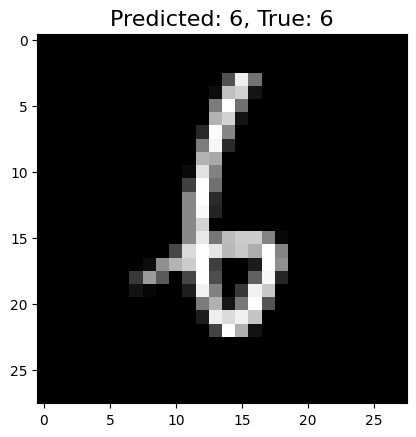

In [18]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sampel_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sampel_pred_class}, True: {y_sample_true}", fontsize=16)
plt.imshow(x_sample.reshape(28,28), cmap='gray')
plt.show()

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

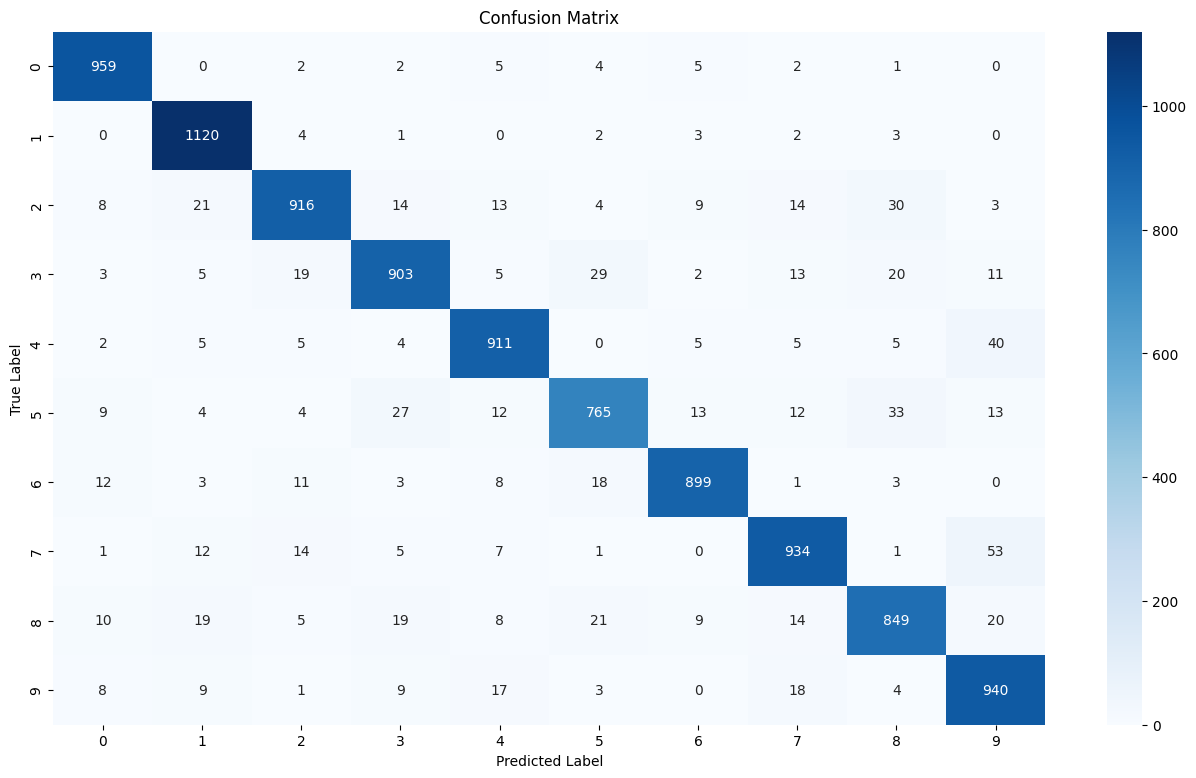

In [19]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Investigate Some Errors

In [20]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [21]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] #last ones

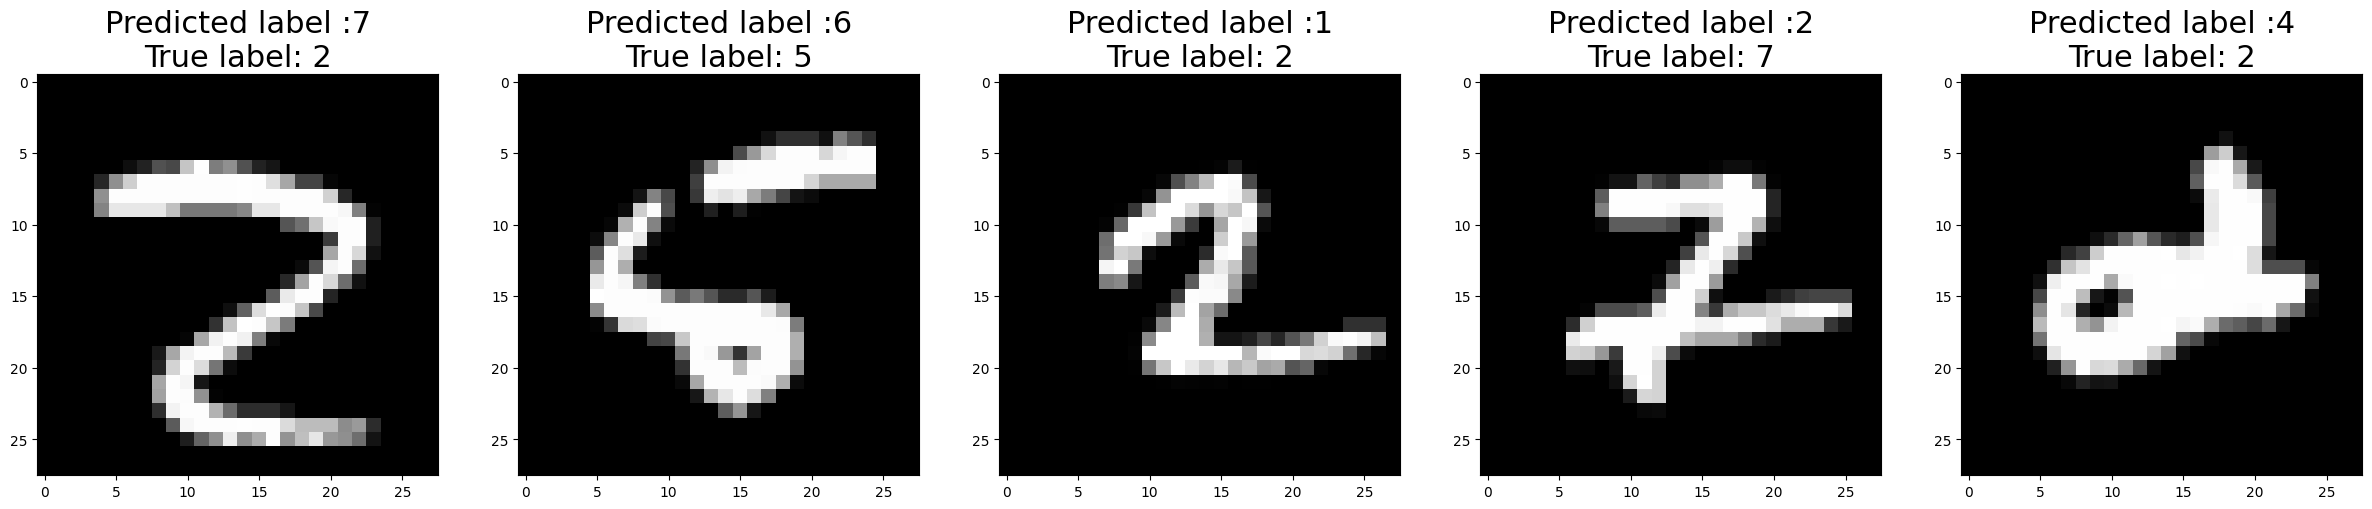

In [22]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30, 30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Predicted label :{y_p}\nTrue label: {y_t}", fontsize=22)
